In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)
import pymongo
from pymongo import MongoClient

client = pymongo.MongoClient('localhost', 27017)

db = client.habs_march27
collection = db['Tweets']
cursor = collection.find()

In [2]:
df = pd.DataFrame(list(cursor))
df[:50]

,_id,created_at,geo,location,name,screen_name,source,text
0,5515f25e7e9aed52feddd69e,2015-03-26 19:59,None,,Montreal Retweets,MontrealRetweet,TweetDeck,RT @habsgirl7: Get your jerseys on boys and gi...
1,5515f25e7e9aed52feddd69f,2015-03-26 19:59,None,"Kingston, Ontario",Stacy,habsgirl7,Twitter for Android,Get your jerseys on boys and girls!! It's game...
2,5515f25e7e9aed52feddd6a0,2015-03-26 19:59,None,Quebec.Ca,Myriam,Myrrham,Twitter Web Client,@lebeauMartinB Ok! Martin!\n#GoHabsGo !
3,5515f25e7e9aed52feddd6a1,2015-03-26 19:59,None,Montréal,Lady Habs,paws_up_4_ever,Twitter for Android,RT @ShannLeah: The Price selfie strikes again!...
4,5515f25e7e9aed52feddd6a2,2015-03-26 19:58,None,"Ottawa, Canada",Alexandra Cazabon,ACaz94,Twitter for iPhone,@CanadiensMTL @sportsexperts Dale Weise #1erBu...
5,5515f25e7e9aed52feddd6a3,2015-03-26 19:58,None,"Shawinigan, Quebec, Canada",Simon Leclerc,PuroresuSimon,Twitter Web Client,#GoHabsGo shoutout: @ShainahX @FinalFantasy997...
6,5515f25e7e9aed52feddd6a4,2015-03-26 19:58,None,,Dimitri Pappas,DimitriPappas1,Twitter for iPhone,RT @ShannLeah: The Price selfie strikes again!...
7,5515f25e7e9aed52feddd6a5,2015-03-26 19:58,None,"Montreal, Canada",Rob Elbaz,RobElbaz,Twitter Web Client,That's it for Your @DesjardinsGroup #MTLHockey...
8,5515f25e7e9aed52feddd6a6,2015-03-26 19:58,None,Cigars / HABS / Hendricks Gin,VIC,HavanaVIC,Twitter for iPhone,@Haynszie @frankdallas52 I'm guessing the #BRU...
9,5515f25e7e9aed52feddd6a7,2015-03-26 19:57,None,,Ntense Level,Lowest_Level,Twitter Web Client,RT @ShannLeah: The Price selfie strikes again!...


In [3]:
df.set_index('created_at', drop=False, inplace=True)

In [4]:
total_tweets = pd.Series.count(df['created_at'])
total_tweets

4253

Show the heaviest tweeting times
-------------------------------------

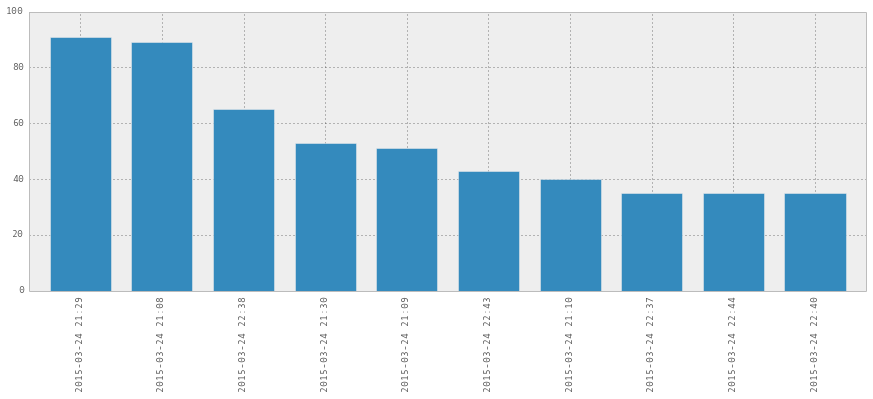

In [5]:
dbase1m = pd.Series.value_counts(df['created_at'], normalize=False, sort=True, ascending=False, bins=None)
dbase1m[:10].plot(kind='bar')

Plot the frequencies of tweets per minute during the past week
-----------------------------------------------------------------------

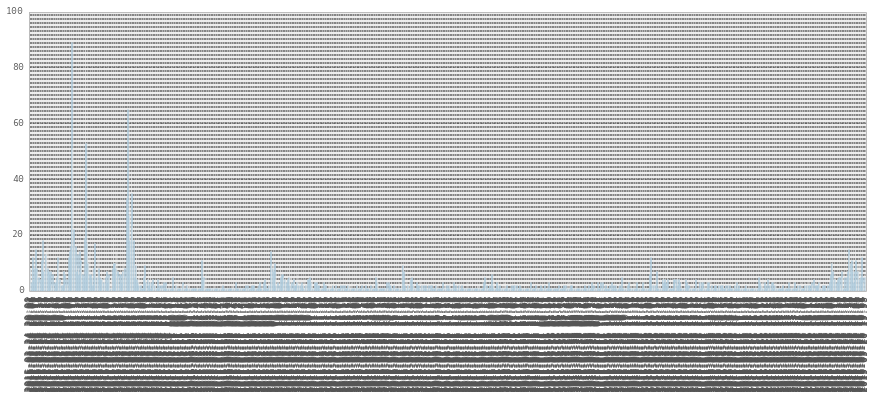

In [6]:
tweet_freq = dbase1m.sort_index()
tweet_freq.plot(kind='bar')

Average tweets per minute during the past week
----------------------------------------------------

In [7]:
avg = int(dbase1m.mean())
avg

3

Most frequent locations tweeted from during the past week
-----------------------------------------------------------------
This is all over the place because anyone is free to put any location they want in twitter.

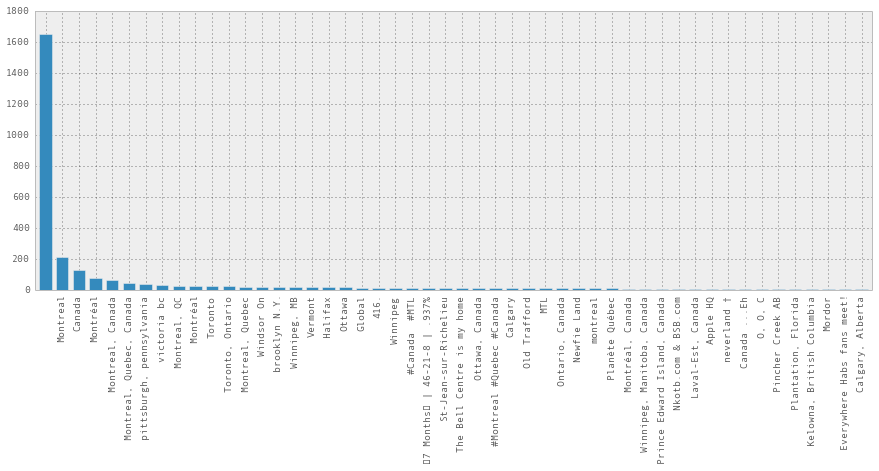

In [8]:
tweeted_from = pd.Series.value_counts(df['location'], normalize=False, sort=True, ascending=False, bins=None)
tweeted_from[:50].plot(kind='bar')

The weeks top tweeters
-------------------------

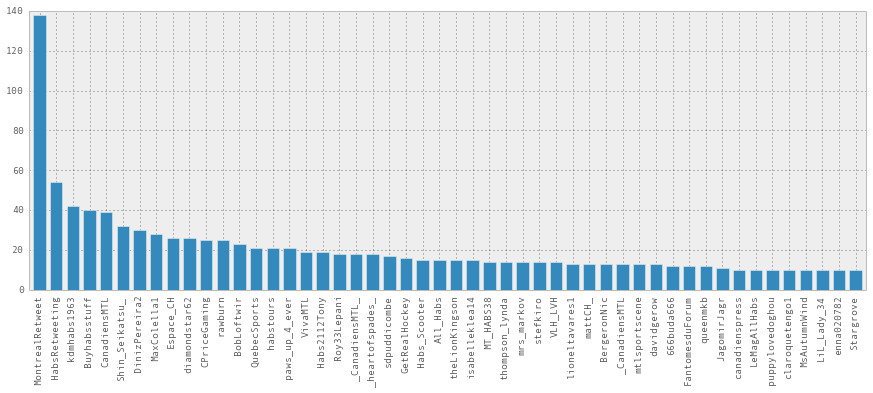

In [9]:
top_tweeter = pd.Series.value_counts(df['name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name = pd.Series.value_counts(df['screen_name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name[:50].plot(kind='bar')

...and these are their twitter names
--------------------------------------

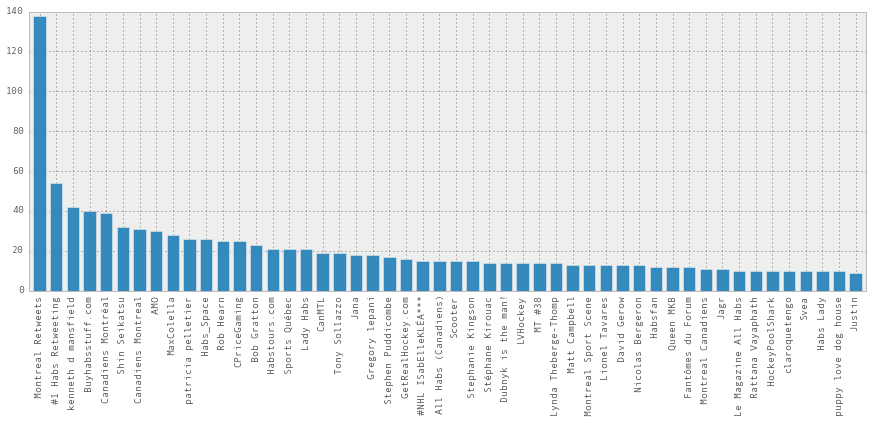

In [10]:
top_tweeter[:50].plot(kind='bar')

The most popular platforms for tweeting
--------------------------------------------

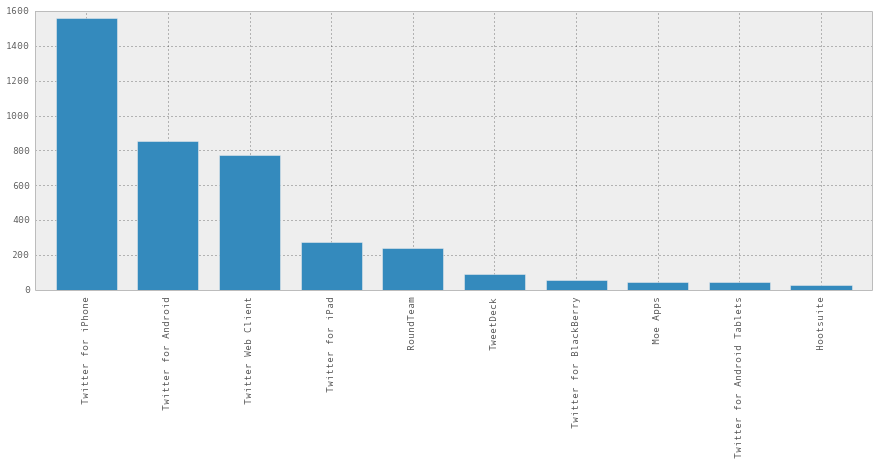

In [11]:
source_tweet = pd.Series.value_counts(df['source'], normalize=False, sort=True, ascending=False, bins=None)
source_tweet[:10].plot(kind='bar')

The following code simply filters out common words like "the" & "and" etc. etc.
------------------------------------------------------------------------------------------

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
stop = stopwords.words('english')
stop2 = stopwords.words('spanish')
otherwords = ['rt', 'vs', '-', '&amp;', '', '#leafs']
text = df['text']
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])

In [13]:
filtered_tokens = [w for w in tokens if not w in stop]
filtered_tokens_spanish = [w for w in filtered_tokens if not w in stop2]
other_filtered = [w for w in filtered_tokens_spanish if not w in otherwords]
freq_dist = nltk.FreqDist(other_filtered)
z = 20
print "The {} most common words tweeted;".format(z)
x = sorted(freq_dist, key=lambda key: (-freq_dist[key], key))[:z]
for entry  in x:
    print entry

The 20 most common words tweeted;
#gohabsgo
@canadiensmtl
#habs
like
game
still
save
us
tonight
💯
feeling
winnipeg
-&gt;
https://t.co/gdfsdjjp8p
first
price
see
habs
1
go


Plotting the top words
-------------------------

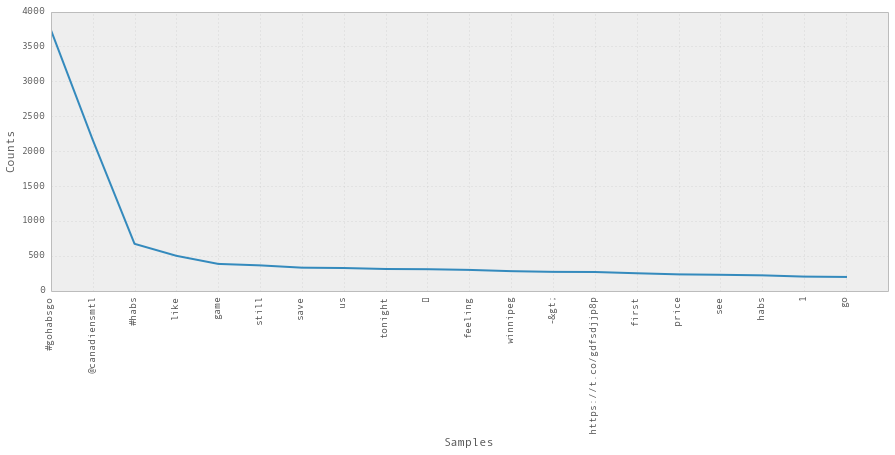

In [14]:
freq_dist.plot(20)

Use Folium to plot geo coordinates on a map
-------------------------------------------------
Only a fraction of twitter users display geo coordinates.  Still gives an interesting map of tweet locations.

In [18]:
import folium
from collections import namedtuple
filepath = "/home/al/projects/twitter/geo/habsgeo.html"
na_coordinates = (43.641438,-79.389353) # Rogers Centre Toronto, Ontario
na_map = folium.Map(location=na_coordinates, zoom_start=4)
Location = namedtuple('Location', ['latitude', 'longitude'])
count_locations = 0

for line in df.geo:
    if line != None:
        count_locations += 1
        geo_coordinates = line['coordinates']
        location = Location(geo_coordinates[1], geo_coordinates[0])
        na_map.circle_marker(location, fill_color='#2622b5', popup=str(location))

na_map.create_map(filepath)

In [19]:
print str(count_locations) + " users reporting coordinates"
print str(total_tweets) + " total tweets"
percent = round(float(count_locations) / float(total_tweets) * 100, 2)
print str(percent) + "%"

141 users reporting coordinates
4253 total tweets
3.32%


Create a map of tweets
============
Start a local webserver with the following

    python -m SimpleHTTPServer 8000

In [20]:
from IPython.display import HTML
HTML('<iframe src=http://localhost:8000/html/habsgeo.html width=960 height=530></iframe>')